# 1 约束求解
* 约束求解 ：根据问题的结构 ，求解组合（优化）问题 
    * 约束编程 ：声明性的编程范式使得变量间的关系表示为约束 
    * 组合（优化）问题的求解技术 
* 约束求解的圣杯 
    * 自然的建模 
    * 有效的求解 
    
* 约束的例子
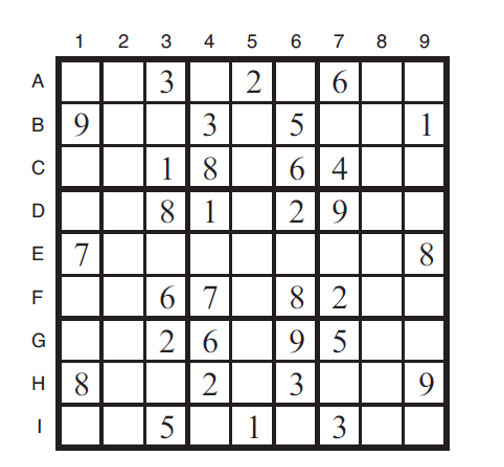


地图染色问题
# 2 CSP
Constraint Satisfaction Problem：中文一般称为**约束可满足问题**，简称CSP
* 表示：三元组< V,D,C >，其中：
     * V是变量的集合
     * D是每个变量的值域
     * C是一组约束
* 目标：对一个变量的赋值，该赋值满足C中所有的约束 
* 例子
    * 课程时间表问题
    * 变量 ：每个课程对应一个变量，例如语文，数学，外语等 
    * 值域：每个变量的值域是可能的，上课时间，例如上午9点，下午3点等 
    * 约束 ：对课程做一些限制 。例如语文课不能在上午9点上课，两门课不能同时开课 
    * 目标 ：对于每一门课，求一个上课时间所形成的课程时间表，要满足所有的约束条件 
## 2.1CSP的描述方式
* Extensional方式：一个约束本质上是一些变量的值域的**迪卡尔集的子集**
    * 是将这些子集的元素详细的写出来 
    * eg:变量x、y，他们的值域均为{1、2、3},表示两个变量相等的约束，要写作：<1,1>,<2,2>,<3,3>

* Intensional方式：是采用一些符号来描述约束 
    * eg:x=y来表示该约束。
## 2.2 约束的维度 
* 一元约束：只包含**一个变量**的约束，
    * 一般可通过给定恰当的值域来描述  
* 二元约束 ：只包含**两个变量**的约束，----它的满足问题是NPC问题
    * 例如不等于大于小于
* 多元约束 ：包含**三个或三个以上变量**的约束
    * eg.alldifferent(x1,x2,x3)
    * 任何多元约束都可以转换为二元约束 
        * alldifferent(x1,x2,x3)<==>x1 ≠ x2, x1 ≠ X3, x2 ≠ x3
    * 在理论上无需多元约束 
    * 在实际中需要 :
        * 为了简洁--在描述上紧凑 
        * 在求解中效率高 
            * 有些多元约束，有其特有的求解算法   

## 2.3Csp问题的求解技术 
* 方法
    * 系统的搜索技术 ---完全搜索 ---目前主要的搜索技术 
        * 不论是否有解，都可以知道 
        * 算法框架--回溯 
            1. 给一个变量赋值 
            2. 传播：其他的未被赋值的变量，在值域中可能有一些值已经不再满足某些约束，删除掉这些值（这是传播）
            3. 如果某个变量的值域中所有的值都被删除，则证明该副职无法导致问题的解，这时进行**回溯**尝试其他的赋值 
    * 局部的搜索技术 --不完全搜索技术 
        * 如果有解，可能给出结果，也可能不给出结果 
        * 求解规模比前者大
        * 算法框架 ：
            1. 首先产生了一个完全的赋值，如果该赋值满足了所有的约束则结束搜索，否则 ：
                2. 改变某些不被满足中的约束的变量的值 
* 传播技术 
    * eg:在前面提到的系统的搜索技术的第2步 ,根据已有的赋值来消减，未被赋值的变量的值域，就是传播
    * 当一个变量的值域被消减后，可能会进一步影响到其他变量，导致其他变量的值域也被消减 ---》传播 
    * 地位重要
    

## 2.4 N皇后问题
* 问题描述：N皇后问题: 在一个N × N的棋盘上放置N个皇后，使得每一行、每一列以及每一斜线上不能有两个以上的皇后。
    * xi: 1..n;第i列、第xi行 
    * 约束：xi ≠ xj;    |xi-xj| ≠ |i-j|.    (0<i<j≤n)   

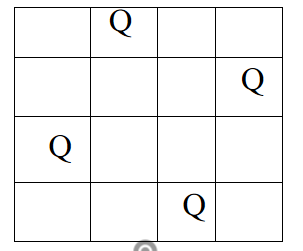


从第一列开始，第一个皇后选择后，删掉同行和斜线上的格子，一步步增加约束   
这个赋值不可用：

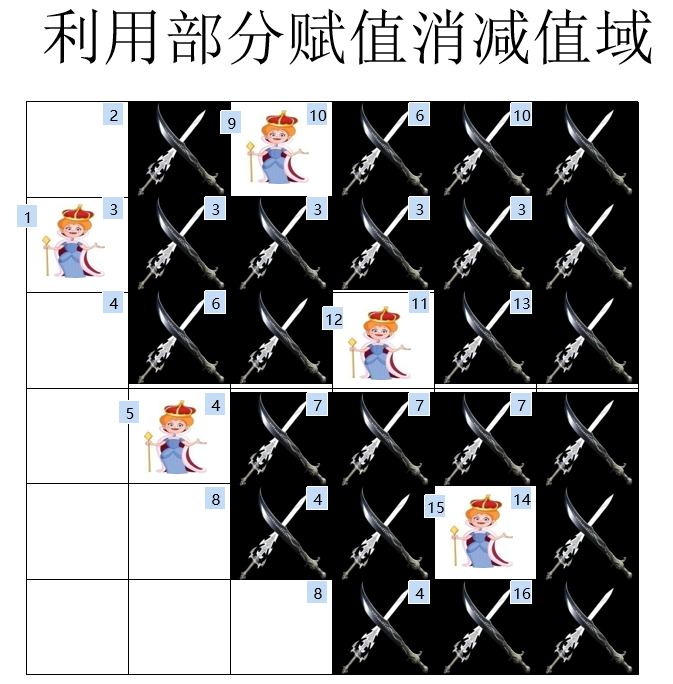

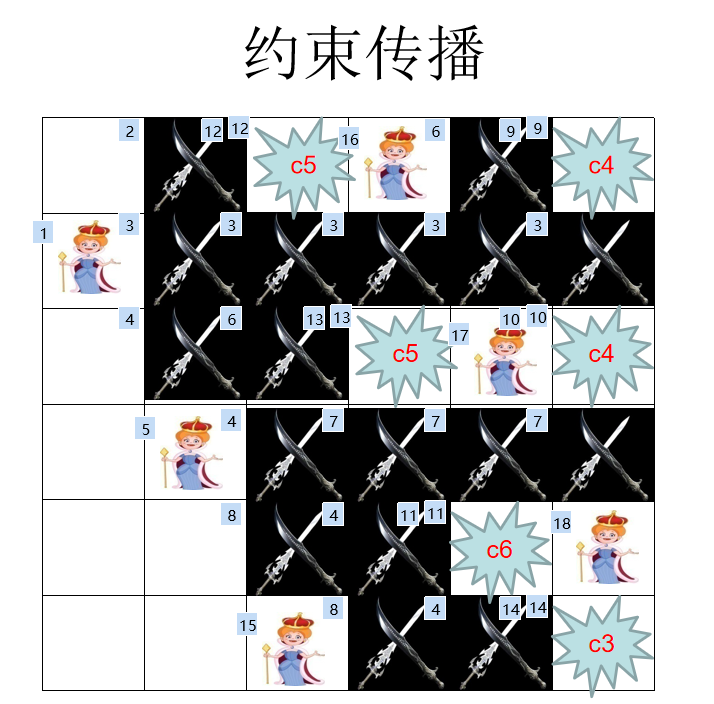   
在第二个皇后确定后，这个约束就不仅仅是第一个和第二个皇后造成的约束了。   
c4--因为第四个皇后造成的约束   
第二个皇后确定后，第四个皇后只有两个位子可以放，所以在其后的格子里，会影响这两个位子的格子，也不应该有皇后在   

## 2.5 一致性
* 传播：是CSP的重要技术
* 一致性（consistency）：是传播时需要加在CSP问题上的重要性质
    * 传播的本质：是为整个CSp问题维持某种一致性 
        * 原本问题是一致的，当某个值被消减掉之后，问题就变得不一致了，这个时候需要再进行值域的消减，以维持一致性 
* 分类
    * 弧一致性

## 2.5.1 弧一致性（Arc-consistency)
* 弧一致性：
    * 给定约束网络R=(X,D,C)
    * 其中$ R_{ij} \in C $
    * 变量xi相对于xj是弧一致<==>
        * 对于每一个$ a_i \in D_i $
        * 都存在一个$ a_j \in D_j $
        * 使得$（a_i a_j) \in R_{ij} $对应的弧是一致的
    * {xi,xj}对应的弧是一致的<==>
        * xi相对于xj是弧一致的
        * 且 xj相对于xi是弧一致的
    * 如果约束网络中所有的弧都是一致的，则约束网络是弧一致的

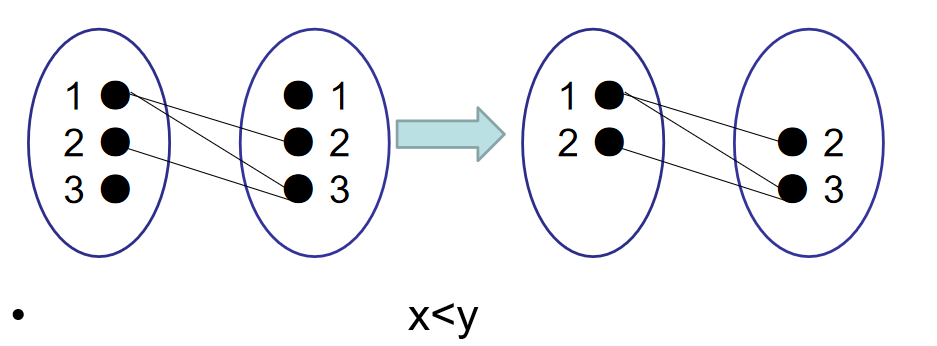

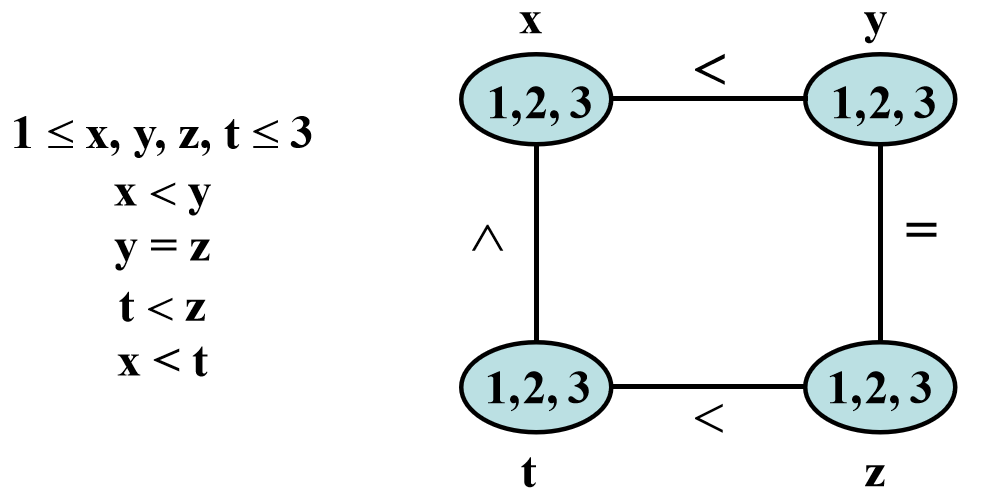   
这个图中，
* 从左上角x开始：y中不存在任何数>3不满足，删除3
* 右上角y：x没有比1小的数，删1
* 右下角z：z中有1，y中无，删1
* t：3<3,删3；1>?,删1
* x:2>2,删2
* z-t:2>2,删z中2，所以y中2也删除    

**对于x，只要存在一个y，能使x<y满足即可**


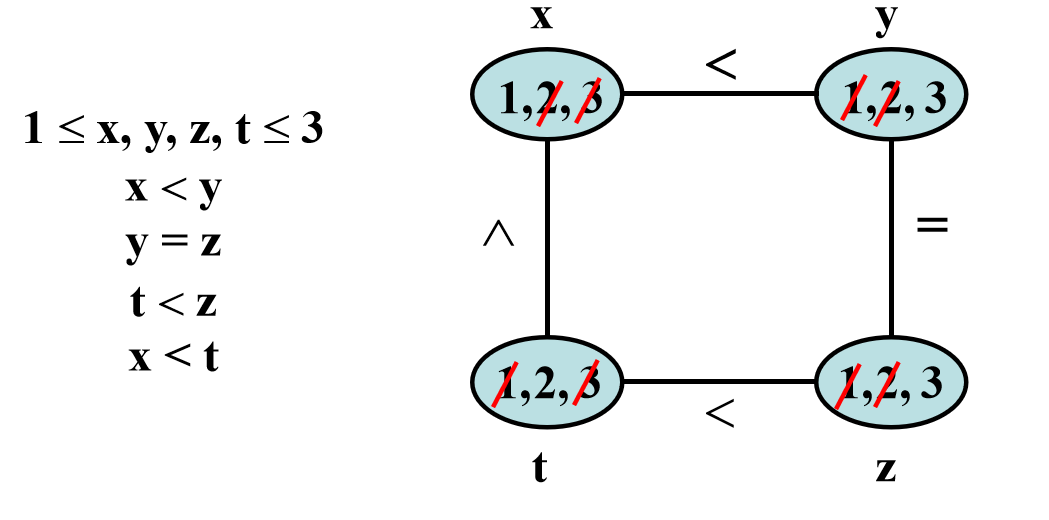

#### 2.5.1.1 弧一致性修正算法
* 适用于：对一条弧/一条约束作用
* REVISE((xi),xj)
    * 输入：由{xi,xj}定义的子网络
    * 定义域：Di,Dj
    * 约束：Rij
    * 输出：Di(经过xi->xj弧约束删减后
    * 对每一个$ a_i \in D_i $(按定义消减（意思跟上图差不多）
        * 如果没有一个$ a_j \in D_j 使得（a_i,a_j) \in R_{ij} $
            * 从D_i中删除a_i
    * 不动Dj
    * $ D_i \leftarrow D_i \cap \pi_i(Rij ⊗ D_j) $   

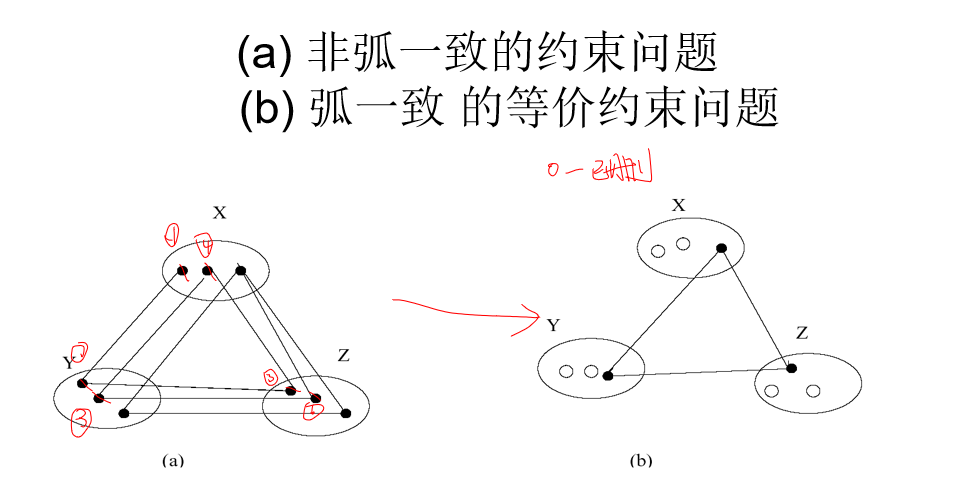

#### 2.5.1.2 AC-1
* 对每一对$ {x_i,x_j}\in C $:
    * REVISE((xi),xj)
    * REVISE((xj),xi)
    
* 终止条件：不再有值域变化--收敛
* 时间：
    * e-弧的数目
    * n-变量的数目
    * k-值域的大小
    * 复杂度：O(en$k^3 $)
        * 每次O(e$k^2 $)，nk次
        * 弧约束：O(e$k^2 $)

#### 2.5.1.3 AC-3(R)
* 对每一对$ {x_i,x_j}\in C $:
    * $ queue=queue \cup \{(x_i,x_j),(x_j,x_i)\}$
* while 队列不空
    * (xi,xj)从队列出来
    * REVISE((xi),xj)
    * 如果有改变Di:
        * $ queue=queue \cup \{(x_k,x_i)|k \neq i\}$
* 复杂度：O(e$k^3 $)
    * 每条弧被放入queue中不超过2k次，每次O($k^2 $)
**实例**
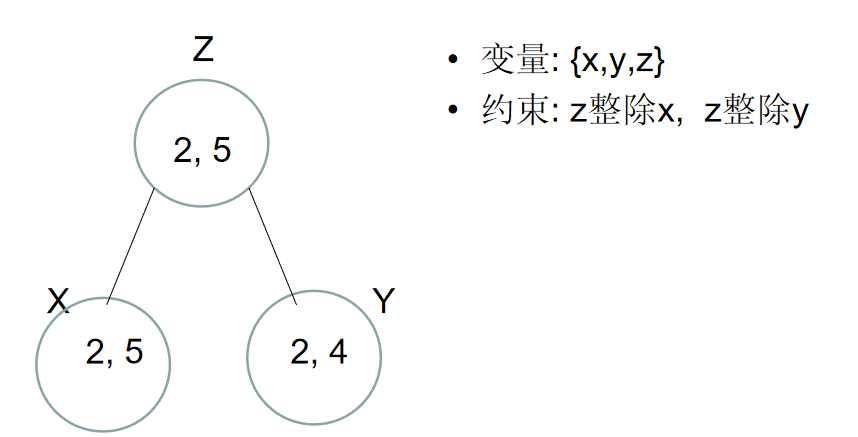
1. 初始队列：queue={(x,z),(z,x),(y,z),(z,y)}
2. (x,z)出列：REVISE
    * x=2,有z=2
    * x=5,有z=5
3. (z,x)出列：REVISE
    * z=2,有x=2
    * z=5,有x=5
4. (y,z)出列：REVISE
    * y=2,有z=2
    * y=4,有z=2-->4/2=2
4. (z,y)出列：REVISE
    * z=2,有y=2
    * z=5,不存在对应y-->删除z=5
    * Dz={2}
    * queue={(x,z),(y,z)}
5. (x,z)出列：REVISE
    * x=2,有z=2
    * x=5,,不存在对应z-->删除x=5
    * Dx={2}
    * queue={(y,z),(z,x)}
6. (y,z)出列：REVISE
    * y=2,有z=2
7. (z,x)出列：REVISE
    * z=2,有x=2 
8. 队列空，结束

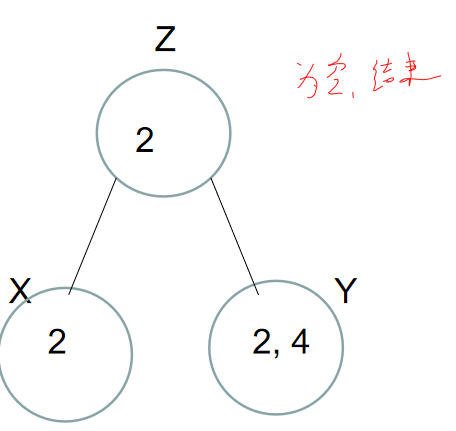

**AC-3求解N皇后问题**
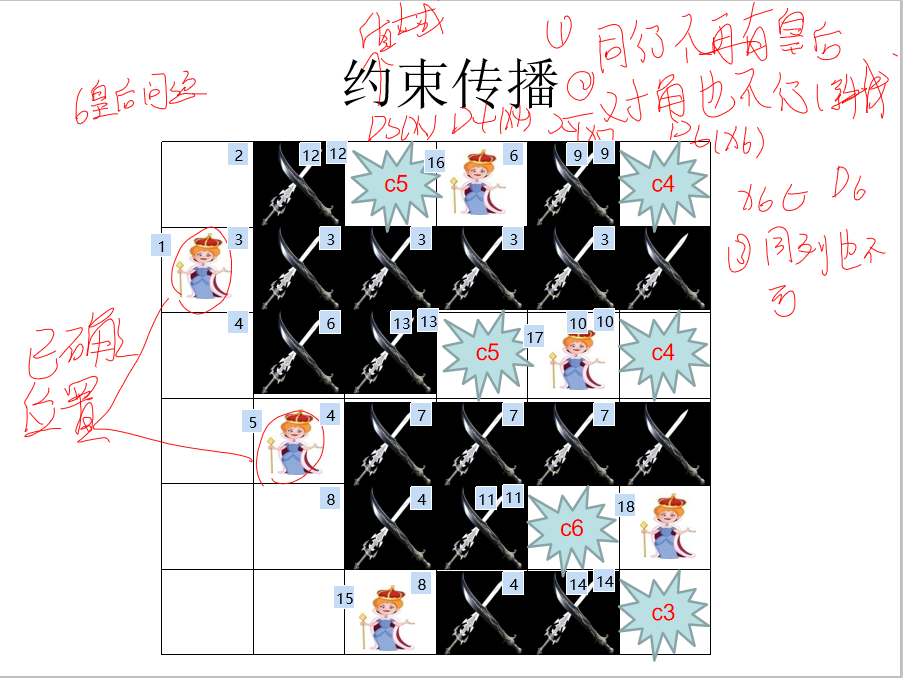   
全连接图
1. D3={1,6} D4={1,3} D5={3,5} D6={1,3,5,6}    Q={(x3,x4),(x4,x3),(x3,x5),(x5,x3),(x3,x6),(x6,x3),(x4,x5),(x5,x4),(x4,x6),(x6,x4),(x5,x6),(x6,x5)}
2. (x3,x4),(x4,x3),(x3,x5),(x5,x3),(x3,x6),(x6,x3),(x4,x5),(x5,x4),(x4,x6)都是弧一致的，值域无变化。 Q={(x6,x4),(x5,x6),(x6,x5)}
3. 检查(x6,x4)的弧一致性，D6变为{5,6}， Q={(x5,x6),(x6,x5),(x3,x6),(x4,x6)}
4. 检查(x5,x6)的弧一致性，D5变为{3}， Q={(x6,x5),(x3,x6),(x4,x6),(x3,x5),(x4,x5)}
5. (x6,x5),(x3,x6),(x4,x6)是弧一致的，值域无变化，Q={(x3,x5),(x4,x5)}
6. 检查(x3,x5)的弧一致性，D3变为{6}， Q={(x4,x5),(x4,x3),(x5,x3),(x6,x3)}
7. 检查(x4,x5)的弧一致性，D4变为{1}， Q={(x4,x3),(x5,x3),(x6,x3),(x3,x4),(x5,x4),(x6,x4)}
8. (x4,x3),(x5,x3)是弧一致的，值域无变化， Q={(x6,x3),(x3,x4),(x5,x4),(x6,x4)}
9. 检查(x6,x3)的弧一致性，D6变为{5}， Q={(x3,x4),(x5,x4),(x6,x4),(x3,x6),(x4,x6),(x5,x6)}
10. Q中剩下的弧都是一致的。最终值域为：D3={6} D4={1} D5={3} D6={5}



#### 2.5.1.4 AC-4
* xi,xj--变量
* cij--约束
* vi,vj--实际取值
* D(xi)---xi的值域
* counter---记录满足约束的vj的个数
* S[xj,vj]---指向vj的xi(变化时被牵连的）
* 初始化：
    * Q为空
    * S[xj,vj]=0
        * $ 对任意v_j \in D(x_j) ,任意x_j \in X $
    * $ foreach x_i \in X,c_{ij} \in C,vi \in D(x_i) $
        * $ counter[x_i,v_i,x_j]=|{v_j \in D(x_j)|(v_i,v_j) \in c_{ij}}| $ (满足xi=vi时cij的xj的v_j个数）
        * if $ counter[x_i,v_i,x_j]=0 $
            * 从D(xi)中移除vi(不存在满足cij的xi=vi的vj（xj)
            * Q.append（xi,vi)
        * 如果$ （v_i,v_j) \in c_{ij} $
            * $ 将(x_i,v_i)添加到S[x_j,v_j] $
        * if D(xi)为空
            * false
* while 队列不空：
    * （xj,vj)出列
    * for (xi,vi) in S[xj,vj]:
        * if $ vi \in D(x_i) $
            *  $ counter[x_i,v_i,x_j]-=1 $
            * if  $ counter[x_i,v_i,x_j]==0 $:
                * D(xi).remove(vi)
                * Q.append(xi,vi)
                * if D(xi)为空
                    * false
* 返回true
* 时间复杂度：O(e$k^2 $)
    * counter个数：2ek
    * counter<=k
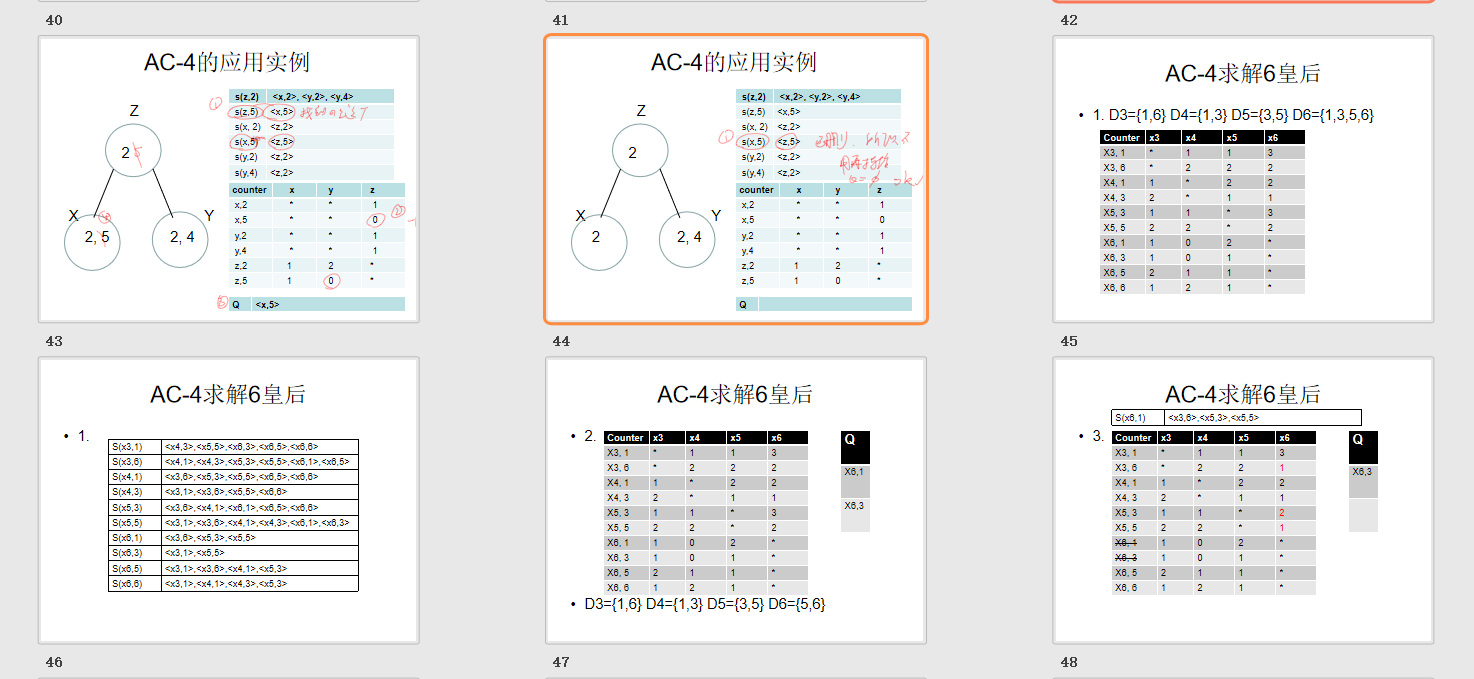

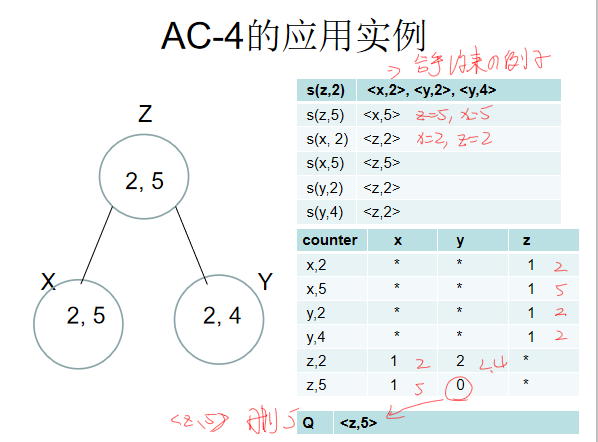

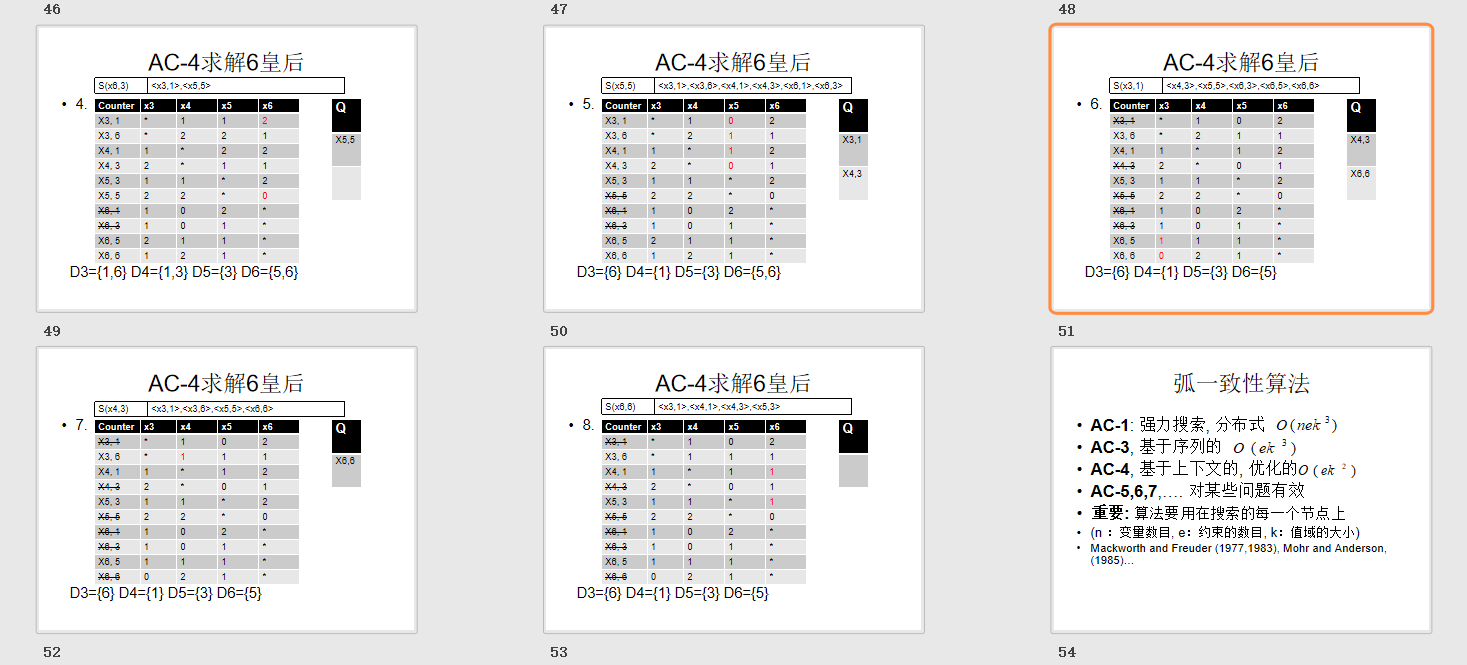

**总结**
1. AC-1 O(en$k^3 $)---基于强力搜索、分布式
2. AC-3 O(e$k^3 $)——基于序列的 
3. AC-4 O(e$k^2 $)——基于上下文的、优化的 
4. AC-5,6,7,...——仅对某些问题有效 
* 重要:算法要用在搜索的每一个节点上
* e：约束的数目 
* n:变量的数目 
* k:值域的大小

**弧一致性不够用**
eg:三角形图用两种颜色的染色问题 ---需要路径一致 或3-一致性的

### 2.5.2 路径一致性 
* 路径一致性 :
    * 给定约束网络 :R=（X,D,C)
    * 一组变量对 {xi,xj}相对于变量xk是路径一致的 <===>
        * 对于每一个一致的赋值$ (<x_i=a_i>,<x_j=a_j>) $
        * 都存在一个$ a_k \in D_k $
        * 使得$ (<x_i=a_i>,<x_k=a_k>) 、 (<x_k=a_k>,<x_j=a_j>) $是一致的
    * 一个约束网络是路径一致的 <==> 
        * 对于任意的Rij和
        * 任意的xk 
        * {xi,xj}相对于xk是路径一致的
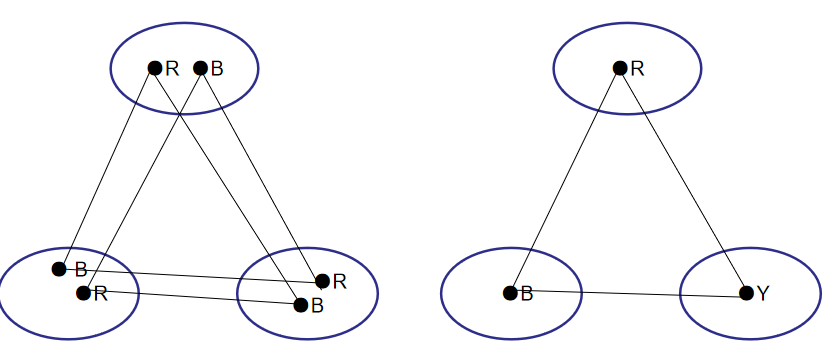

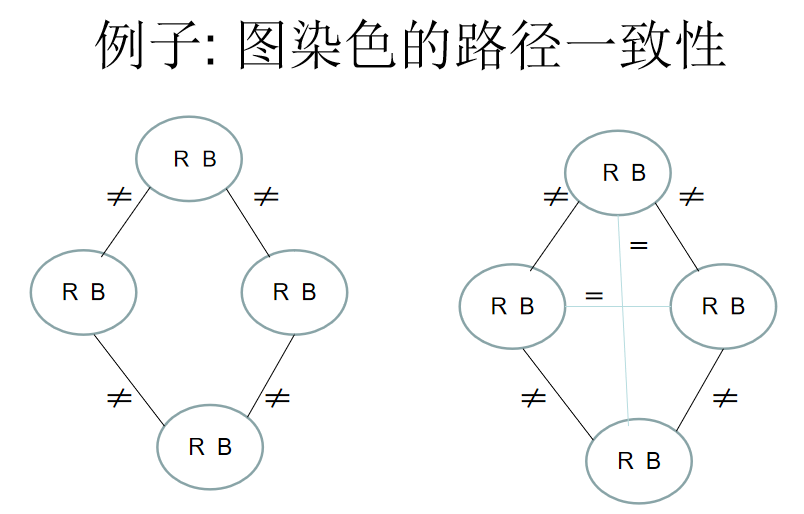

### 2.5.3 全局约束
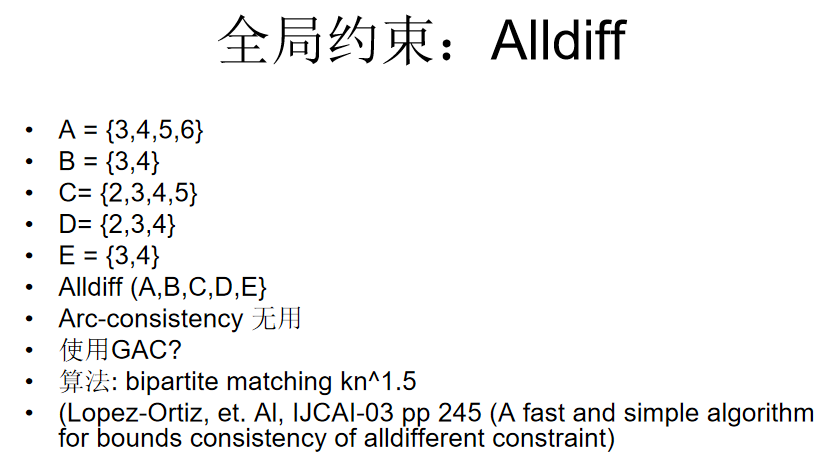